# Klasyfikacja: Support Vector Machine


Support Vector Machine / Maszyna wektorów nośnych

Algorytm mający za zadanie znalezienie n-wymiarowej płaszczyzny, która jednoznacznie rozróżnia od siebie (klasyfikuje) punkty danych. Algorytm stara się znależć płaszczyznę optymalną tj. taką, która maksymalizuje margines, między punktami danych.
W przypadku przestrzeni dwuwymiarowej SVM przyjmuje postać linii. 

[Więcej informacji o SVM](https://towardsdatascience.com/support-vector-machine-introduction-to-machine-learning-algorithms-934a444fca47)


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import itertools

### Dane
Dane pochodzą z archiwum UCI. To zbiór 1372 obserwacji zdjęć banknotów skwantyfikowanych w 4 wartości liczbowe. 
1. variance of Wavelet Transformed image (continuous)
2. skewness of Wavelet Transformed image (continuous)
3. curtosis of Wavelet Transformed image (continuous)
4. entropy of image (continuous)

Każda obserwacja ponadto posiada informację o klasie - banknot prawdziwy - fałszywy

https://archive.ics.uci.edu/ml/datasets/banknote+authentication



In [8]:
df = pd.read_csv('data_banknote_authentication.txt', header=None)
df

,0,1,2,3,4
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


### Podział na zbiór treningowy / testowy

In [9]:
X = np.array(df.iloc[:,:4])
Y = np.array(df.iloc[:,4])
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=292, test_size=0.3)

### Wizualizacja danych

Dane są wyrażone wyrażone w 4 wymiarach. Nie jesteśmy w stanie ich zwizualizować na jednym obiekcie, ale możemy przedstawić wszystkie 2 wymiarowe kombinacje.

In [10]:
plot_specs = {
    0: {'color':'grey', 'mark':'x'},
    1: {'color':'red', 'mark':'o'}
}
def getSpecs(y):
    return plot_specs[y]['color'],  plot_specs[y]['mark']

def plotSet(df, col1, col2, Y):
    specs = np.vectorize(getSpecs)(Y)
    #print=specs[1]
    
    plt.scatter(x=df[:, col1], 
                y=df[:, col2],
               c=specs[0],
               marker='x',
               s=10)

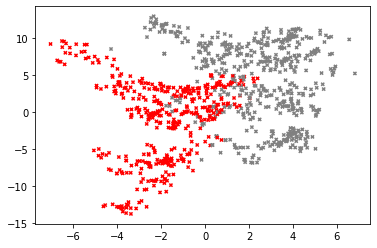

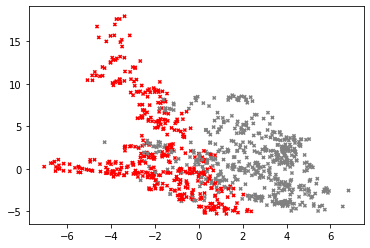

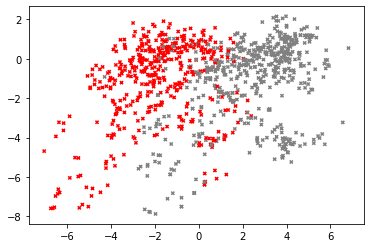

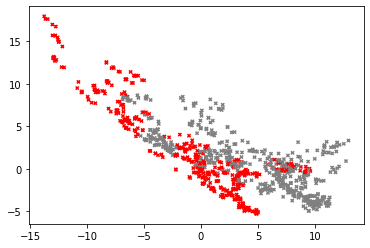

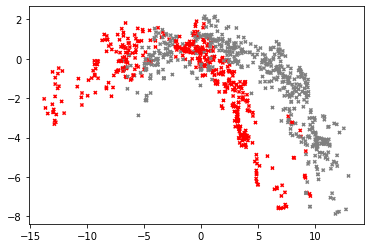

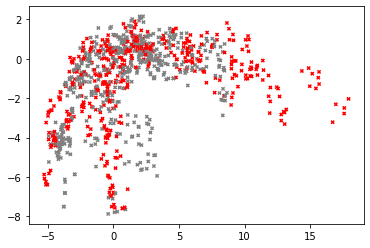

In [11]:
for comb in itertools.combinations([0,1,2,3], 2):
    plotSet(X_train, comb[0], comb[1], Y_train) 
    plt.show()



## SVM: Przykład dla 2 wymiarów

### PCA
Przedstawienie działania SVM będzie prostsze dla przykładu dwuwymiarowego. W związku z tym ograniczymy zmienne metodą składowych głównych tj. ograniczymy liczbę zmiennych zachowując jak największą możliwą do wytłumaczenia wariancje poprzez mniej zmiennych. 

In [96]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X_train)

print(pca.explained_variance_ratio_)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.fit_transform(X_test)

#Y_pca = pca.fit_transform(Y)


[0.76447426 0.14090103]


Pierwsza zmienna odpowiada za 76% wariancji zbioru, druga to nieco ponad 14%. Sumarycznie nowy zbiór złożony z dwóch zmiennych tłumaczy ponad 90% zmienności występującej w zbiorze pierwotnym.

In [97]:
#plotSet(X_train_pca, 0, 1, Y_train)  

In [98]:
svm = SVC(kernel='linear')
svm.fit(X_train_pca, Y_train)
Y_pred = svm.predict(X_test_pca)

print("Training score accuracy:",
      svm.score(X_train_pca, Y_train))

print("Test score accuracy:",
      svm.score(X_test_pca, Y_test))

Training score accuracy: 0.75
Test score accuracy: 0.7038834951456311


#### Wizualizacja - klasy faktyczne

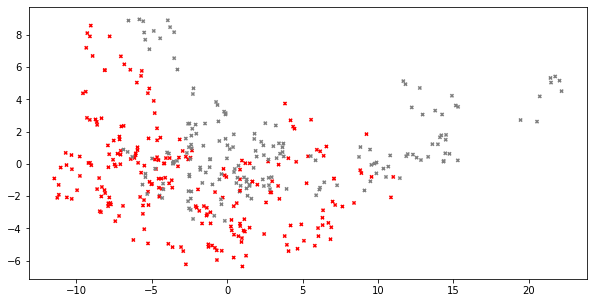

In [99]:
plt.rcParams["figure.figsize"] = (10,5)
plotSet(X_test_pca, 0, 1, Y_test)

### Wizualizacja - predykcja 

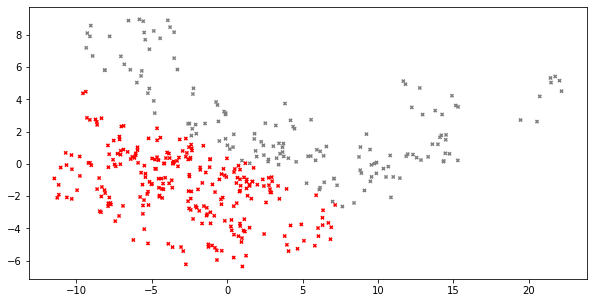

In [101]:
plotSet(X_test_pca, 0, 1, Y_pred)

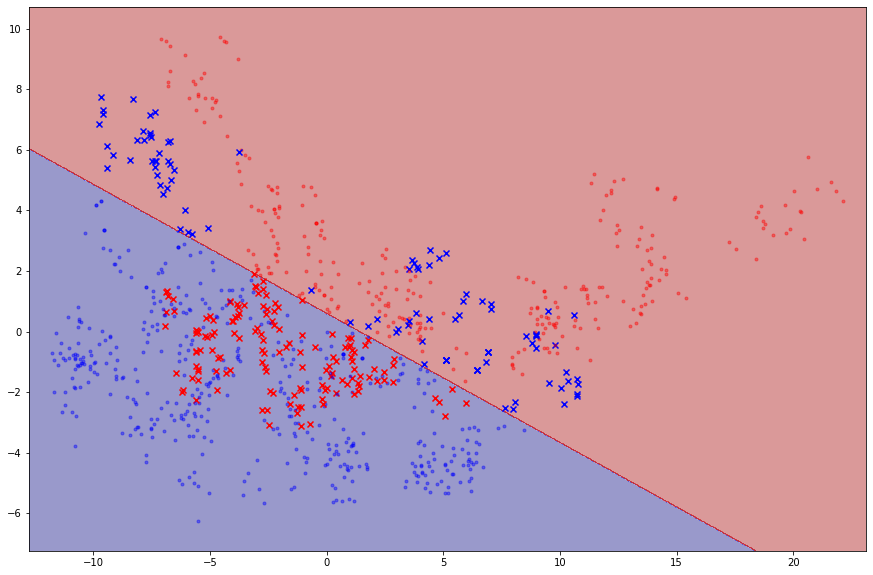

In [102]:
plt.rcParams["figure.figsize"] = (15,10)

X = X_train_pca  
h = .02  # step size in the mesh

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
y_mis = svm.predict(X_train_pca) == Y_train

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.seismic, alpha=0.4)

plot_specs = {
    0: {'color':'blue', 'mark':'x'},
    1: {'color':'red', 'mark':'.'}
}
marker = np.vectorize(getSpecs)(y_mis)[1]
color = np.vectorize(getSpecs)(y)[0]

for _s, c, _x, _y in zip(marker, color, X[:, 0], X[:, 1]):
    alph = .4 if _s == '.' else 1.
    plt.scatter(_x, _y, marker=_s, c=c, alpha=alph)

plt.show()

Kolor punktu oznacza przynależność do faktycznej klasy.

Kolorowe obszary oznaczają klasyfikację wg SVM dla zbioru przekształconego wg PCA do 2 składowych. 

Marker puntu oznacza czy punkt został sklasyfikowany poprawnie czy niepoprawnie

## SVM na 4 wymiarach
Redukcja wymiarów upraszcza model i sparwia, że koncept łatwo przedstawić w przestrzeni dwuwymiarowej. Algorytm SVM działa jednak w przestrzeni n-wymiarowej i przy wykorzystaniu wszystkich 4 wymiarów, możemy zwiększyć skuteczność predykcji. 


In [105]:
svm = SVC(kernel='linear')
svm.fit(X_train, Y_train)
Y_pred_train = svm.predict(X_train)
Y_pred_test = svm.predict(X_test)

print("Training score accuracy:",
      svm.score(X_train, Y_train))

print("Test score accuracy:",
      svm.score(X_test, Y_test))

Training score accuracy: 0.9895833333333334
Test score accuracy: 0.9927184466019418


Dokładność przy wszystkich 4 wymiarach wzrosła z 70% do aż 99%. Wykorzystany zbiór jest przewidziany do wykorzystania w klasyfikacji binarnej. Z pewnością cięzko będzie uzyskać podobną precyzję w innych zbiorach. 


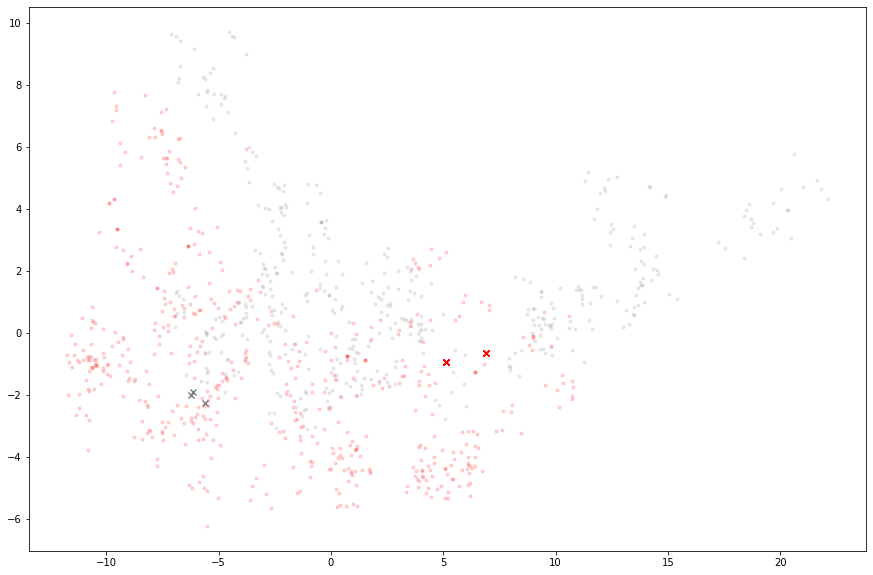

In [106]:
X = X_train_pca
y = Y_train
y_mis = (Y_pred_train==Y_train)

plot_specs = {
    0: {'color':'red', 'mark':'x'},
    1: {'color':'grey', 'mark':'.'}
}

marker = np.vectorize(getSpecs)(y_mis)[1]
color = np.vectorize(getSpecs)(y)[0]

for _s, c, _x, _y in zip(marker, color, X[:, 0], X[:, 1]):
    alph = .15 if _s == '.' else 1.
    plt.scatter(_x, _y, marker=_s, c=c, alpha=alph)

Powyżej widzimy efekt algorytmu klasyfikacji przeprowadzonej na 4 zmiennych zrzutowany na dwuwymiarowy układ metodą PCA. Jedynie 5 punktów zostało sklasyfikowanych niepoprawnie.

